In [1]:
import os
from PIL import Image
import numpy as np
import cv2

In [2]:
_,_,image_list = next(os.walk("./images"))
image_list = image_list[:10000]

In [16]:
# Model_dot
count = 0

for img_name in image_list:
    
    img_input = Image.open('./images/'+img_name)
    label = float(img_name.split('_')[1][:-4])

    img = img_input.convert("L")
    img = np.asarray(img)
    img = img[5:-5][6:-6]
    img = cv2.bilateralFilter(img,9,50,30)
    feature = img.mean(axis=1)
    bound = (np.max(feature)+np.min(feature))/2
    
    _count = 0
    percentage = 0
    for i in range(len(feature)-1):
        if _count == 2: break
        if (feature[i]-bound)*(feature[i+1]-bound)<=0:
            percentage += (i+i+1)/2
            _count += 1
            
    percentage = 1-(percentage/2+5)/(len(feature)+10)
    if abs(pos-label)<0.05:
        count+=1
        # cv2.imshow('image',img)
        # cv2.waitKey(0)
    # else:
    #     print(img_name)

    

#print(img_name)

In [17]:
count, len(image_list)

(1057, 10000)

In [18]:
label, pos

(0.48374246286777906, 0.4568965517241379)

In [ ]:
summ/(len(image_list)-skip)

In [8]:
Image.open('./images/'+'0056667e465a_0.09288294747046572.jpg').show()

<Axes: >

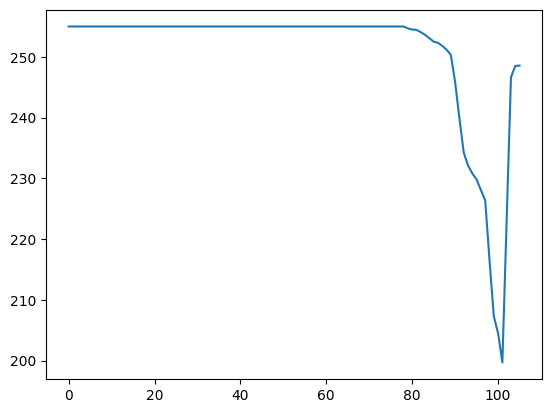

In [8]:
import seaborn as sn
sn.lineplot(feature)

In [ ]:
sn.scatterplot([per,labels])